<a href="https://colab.research.google.com/github/keshsri/machine-learning/blob/main/Titanic_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile

local_zip = './titanic.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./titanic')

zip_ref.close()

In [ ]:
import pandas as pd

train_data = pd.read_csv('./titanic/train.csv')
test_data = pd.read_csv('./titanic/test.csv')

In [ ]:
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [ ]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

train_data.columns = train_data.columns.str.replace(' ','')

print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [ ]:
train_data = pd.get_dummies(train_data, columns = ['Sex','Embarked'], drop_first=True)

x_train = train_data.drop(['Survived','PassengerId','Name','Ticket','Cabin'], axis = 1)
y_train = train_data['Survived']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, random_state=42)

X_train, X_train_val, Y_train, Y_train_val = train_test_split(X_train, Y_train, random_state=42)

In [ ]:
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Dense(64, activation = 'relu', input_dim=x_train.shape[1]),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'Adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, epochs = 50, validation_data=(X_train_val, Y_train_val))

Epoch 1/50
16/16 [==============================] - 5s 38ms/step - loss: 0.6378 - accuracy: 0.6707 - val_loss: 0.5813 - val_accuracy: 0.7485
Epoch 2/50
16/16 [==============================] - 0s 23ms/step - loss: 0.5528 - accuracy: 0.7884 - val_loss: 0.5189 - val_accuracy: 0.7964
Epoch 3/50
16/16 [==============================] - 0s 16ms/step - loss: 0.4952 - accuracy: 0.8004 - val_loss: 0.4740 - val_accuracy: 0.8204
Epoch 4/50
16/16 [==============================] - 0s 11ms/step - loss: 0.4627 - accuracy: 0.8044 - val_loss: 0.4471 - val_accuracy: 0.8263
Epoch 5/50
16/16 [==============================] - 0s 10ms/step - loss: 0.4462 - accuracy: 0.8104 - val_loss: 0.4367 - val_accuracy: 0.8084
Epoch 6/50
16/16 [==============================] - 0s 9ms/step - loss: 0.4361 - accuracy: 0.8204 - val_loss: 0.4252 - val_accuracy: 0.8323
Epoch 7/50
16/16 [==============================] - 0s 12ms/step - loss: 0.4292 - accuracy: 0.8164 - val_loss: 0.4198 - val_accuracy: 0.8263
Epoch 8/50
16/

Text(0.5, 1.0, 'Training and validation loss')

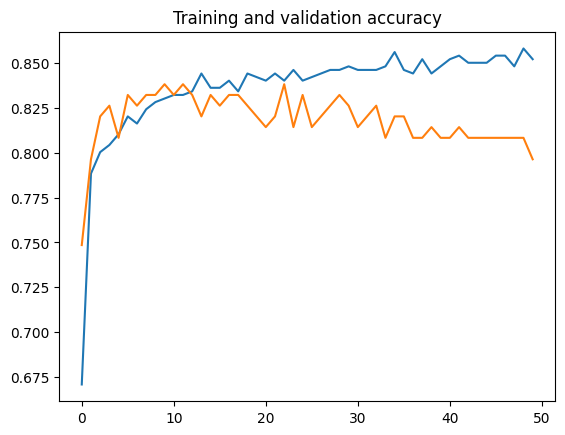

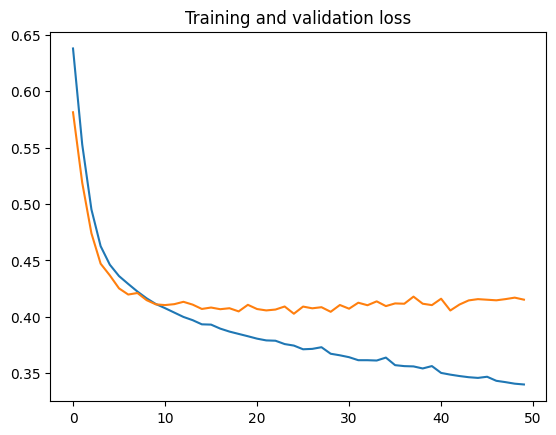

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc))

plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [ ]:
test_data.columns = test_data.columns.str.replace(' ','')

test_data = pd.get_dummies(test_data, columns = ['Sex','Embarked'], drop_first=True)

x_test = test_data.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1)

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')

7/7 [==============================] - 0s 3ms/step - loss: 0.4519 - accuracy: 0.8072
Test Accuracy: 0.8071748614311218
Test Loss: 0.4518563747406006


In [ ]:
predict = model.predict(x_test)

14/14 [==============================] - 0s 2ms/step


In [ ]:
import numpy as np

predict_round = np.round(predict, 1)
prediction = predict_round.astype(int)

print(len(prediction))

418


In [ ]:
result = pd.DataFrame()

result['PassengerId'] = test_data['PassengerId']
result['Survived'] = prediction

result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
result.to_csv('./gender_submissions.csv')